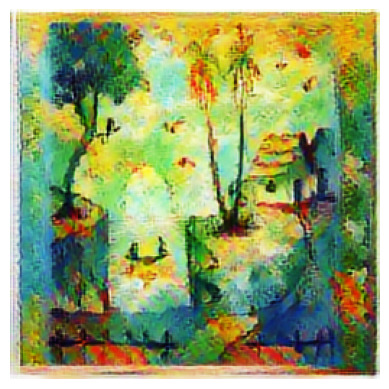

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import PIL.Image

# Load the pre-trained VGG19 model from TensorFlow Hub
vgg_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

def load_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = image[tf.newaxis, :]
    return image

def preprocess_image(image):
    image = tf.image.resize(image, (256, 256))
    return image

# Function to perform style transfer
def style_transfer(content_image, style_image):
    stylized_image = vgg_model(tf.constant(content_image), tf.constant(style_image))[0]
    return stylized_image

content_image_path = 'content.jpg'  # Path to the user's content image
style_image_path = 'style.jpg'      # Path to the predefined style image

content_image = load_image(content_image_path)
style_image = load_image(style_image_path)

# Preprocess images
content_image = preprocess_image(content_image)
style_image = preprocess_image(style_image)

# Perform style transfer
stylized_image = style_transfer(content_image, style_image)

# Post-process the stylized image
stylized_image = tf.squeeze(stylized_image, axis=0)
stylized_image = tf.clip_by_value(stylized_image, 0, 1)

# Convert tensor to numpy array
stylized_image = np.array(stylized_image * 255, dtype=np.uint8)

# Display the stylized image
plt.imshow(stylized_image)
plt.axis('off')
plt.show()

# Save the stylized image
output_image_path = 'output.jpg'
PIL.Image.fromarray(stylized_image).save(output_image_path)
